In [19]:
import numpy as np
import pandas as pd

crits = {
    "Калорийность": {"weight": 4, "direction": "max"},
    "Питательная ценность": {"weight": 3, "direction": "max"},
    "Время приготовления": {"weight": 5, "direction": "min"},
    "Доступность": {"weight": 5, "direction": "max"},
    "Цена": {"weight": 2, "direction": "min"}
}

alternatives = {
    "Овсянка с фруктами и орехами": [10, 10, 15, 15, 10],
    "Гречневая каша с овощами": [10, 10, 15, 10, 5],
    "Яичница с овощами": [5, 5, 5, 5, 5],
    "Смузи из зелени и фруктов": [5, 15, 5, 10, 10],
    "Творожная запеканка с ягодами": [15, 10, 10, 15, 5],
    "Тосты с авокадо и яйцом": [15, 10, 10, 10, 10],
    "Кускус с овощами и фетой": [5, 5, 10, 10, 5],
    "Йогурт с мюсли и свежими фруктами": [15, 15, 15, 15, 5],
    "Бутерброды с лососем": [10, 10, 5, 5, 5],
    "Бутерброд с сыром на козьем молоке": [10, 10, 15, 10, 10]
}

preference_matrix = pd.DataFrame(np.zeros((len(alternatives), len(alternatives))),
                                 index=alternatives.keys(), columns=alternatives.keys())

def calculate_P_N_D(alt1, alt2, crits):
    P, N = 0, 0
    for i, crit in enumerate(crits):
        weight = crits[crit]["weight"]
        direction = crits[crit]["direction"]
        a1, a2 = alt1[i], alt2[i]
        if a1 != a2:
            if (direction == "max" and a1 > a2) or (direction == "min" and a1 < a2):
                P += weight
            else:
                N += weight
    D = P / N if N != 0 else np.inf
    return P, N, D

for i, alt1 in enumerate(alternatives.keys(), start=1):
    for j, alt2 in enumerate(alternatives.keys(), start=1):
        if alt1 != alt2:
            P, N, D = calculate_P_N_D(np.array(alternatives[alt1]), np.array(alternatives[alt2]), crits)
            value_to_input = None
            if D>=1 and D != np.inf:
                value_to_input = np.round(D, 3)
            elif D == np.inf:
                value_to_input = np.inf
            else:
                value_to_input = -1
            preference_matrix.at[alt1, alt2] = value_to_input

preference_matrix


Рассмотрим альтернативы 1 и 2
P = 5
N = 2
D = 2.5  - Принимаем

Рассмотрим альтернативы 1 и 3
P = 12
N = 7
D = 1.714  - Принимаем

Рассмотрим альтернативы 1 и 4
P = 9
N = 8
D = 1.125  - Принимаем

Рассмотрим альтернативы 1 и 5
P = 0
N = 11
D = 0.0  - Отбрасываем

Рассмотрим альтернативы 1 и 6
P = 5
N = 9
D = 0.556  - Отбрасываем

Рассмотрим альтернативы 1 и 7
P = 12
N = 7
D = 1.714  - Принимаем

Рассмотрим альтернативы 1 и 8
P = 0
N = 9
D = 0.0  - Отбрасываем

Рассмотрим альтернативы 1 и 9
P = 5
N = 7
D = 0.714  - Отбрасываем

Рассмотрим альтернативы 1 и 10
P = 5
N = 0
D = inf  - Принимаем

Рассмотрим альтернативы 2 и 1
P = 2
N = 5
D = 0.4  - Отбрасываем

Рассмотрим альтернативы 2 и 3
P = 12
N = 5
D = 2.4  - Принимаем

Рассмотрим альтернативы 2 и 4
P = 6
N = 8
D = 0.75  - Отбрасываем

Рассмотрим альтернативы 2 и 5
P = 0
N = 14
D = 0.0  - Отбрасываем

Рассмотрим альтернативы 2 и 6
P = 2
N = 9
D = 0.222  - Отбрасываем

Рассмотрим альтернативы 2 и 7
P = 7
N = 5
D = 1.4  - Принимаем

Расс

,Овсянка с фруктами и орехами,Гречневая каша с овощами,Яичница с овощами,Смузи из зелени и фруктов,Творожная запеканка с ягодами,Тосты с авокадо и яйцом,Кускус с овощами и фетой,Йогурт с мюсли и свежими фруктами,Бутерброды с лососем,Бутерброд с сыром на козьем молоке
Овсянка с фруктами и орехами,0.0,2.500,1.714,1.125,-1.0,-1.0,1.714,-1.000,-1.000,inf
Гречневая каша с овощами,-1.0,0.000,2.400,-1.000,-1.0,-1.0,1.400,-1.000,1.000,inf
Яичница с овощами,-1.0,-1.000,0.000,-1.000,-1.0,-1.0,1.000,-1.000,-1.000,-1.0
Смузи из зелени и фруктов,-1.0,1.333,4.000,0.000,-1.0,2.0,4.000,-1.000,1.333,2.0
Творожная запеканка с ягодами,inf,inf,2.400,1.375,0.0,inf,inf,1.667,1.800,inf
Тосты с авокадо и яйцом,1.8,4.500,1.714,-1.000,-1.0,0.0,3.500,-1.000,1.286,inf
Кускус с овощами и фетой,-1.0,-1.000,1.000,-1.000,-1.0,-1.0,0.000,-1.000,-1.000,1.0
Йогурт с мюсли и свежими фруктами,inf,inf,2.400,2.200,-1.0,2.0,2.400,0.000,2.400,inf
Бутерброды с лососем,1.4,1.000,inf,-1.000,-1.0,-1.0,2.400,-1.000,0.000,1.4
Бутерброд с сыром на козьем молоке,-1.0,-1.000,1.714,-1.000,-1.0,-1.0,1.000,-1.000,-1.000,0.0


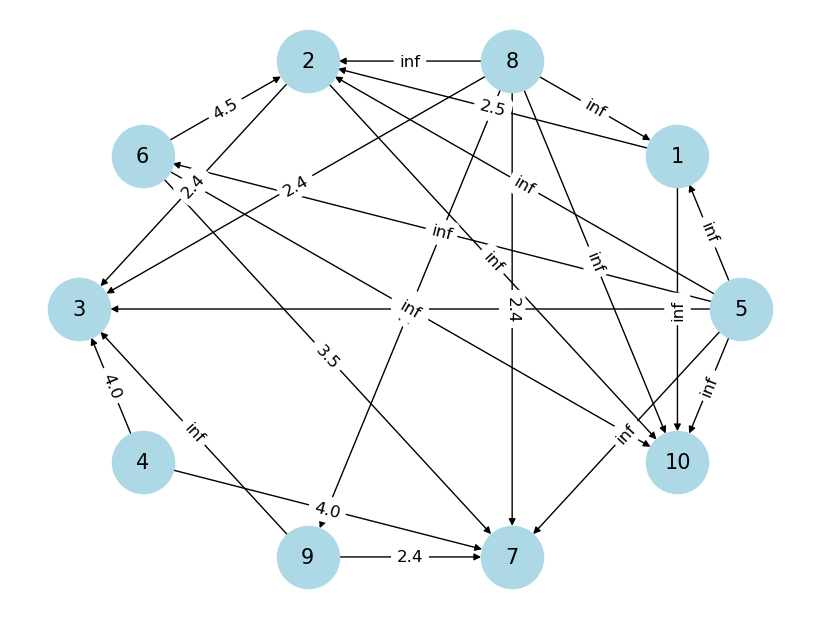

In [27]:
from matplotlib import pyplot as plt
import networkx as nx

big_number = np.inf
preference_matrix_transposed = [
    [None, None, None, None, big_number, 1.8, None, big_number, 1.4, None],
    [2.500, None, None, 1.333, big_number, 4.500, None, big_number, 1.000, None],
    [1.714, 2.400, None, 4.000, 2.400, 1.714, 1.000, 2.400, big_number, 1.714],
    [1.125, None, None, None, 1.375, None, None, 2.200, None, None],
    [None, None, None, None, None, None, None, None, None, None],
    [None, None, None, 2.0, big_number, None, None, 2.0, None, None],
    [1.714, 1.400, 1.000, 4.000, big_number, 3.500, None, 2.400, 2.400, 1.000],
    [None, None, None, None, 1.667, None, None, None, None, None],
    [None, 1.000, None, 1.333, 1.800, 1.286, None, 2.400, None, None],
    [big_number, big_number, None, 2.0, big_number, big_number, 1.0, big_number, 1.4, None]
]


preference_matrix_transposed2 = [
    [None, None, None, None, big_number, None, None, big_number, None, None],
    [2.500, None, None, None, big_number, 4.500, None, big_number, None, None],
    [None, 2.400, None, 4.000, 2.400, None, None, 2.400, big_number, None],
    [None, None, None, None, None, None, None, None, None, None],
    [None, None, None, None, None, None, None, None, None, None],
    [None, None, None, None, big_number, None, None, None, None, None],
    [None, None, None, 4.000, big_number, 3.500, None, 2.400, 2.400, None],
    [None, None, None, None, None, None, None, None, None, None],
    [None, None, None, None, None, None, None, 2.400, None, None],
    [big_number, big_number, None, None, big_number, big_number, None, big_number, None, None]
]

G_inverted = nx.DiGraph()

for i, row in enumerate(preference_matrix_transposed2):
    for j, val in enumerate(row):
        if val is not None:
            G_inverted.add_edge(j + 1, i + 1, weight='inf' if val == big_number else val)

pos_inverted = nx.circular_layout(G_inverted)
plt.figure(figsize=(8, 6))
nx.draw(G_inverted, pos_inverted, with_labels=True, node_color='lightblue', node_size=2000, font_size=15)

edge_labels_inverted = {(u, v): d['weight'] for u, v, d in G_inverted.edges(data=True)}
nx.draw_networkx_edge_labels(G_inverted, pos_inverted, edge_labels=edge_labels_inverted, font_size=12)

plt.show()

In [30]:
preference_matrix = preference_matrix.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x <= 2.4 else x)
preference_matrix

/tmp/ipykernel_28136/2920757007.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preference_matrix = preference_matrix.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x <= 2.4 else x)


,Овсянка с фруктами и орехами,Гречневая каша с овощами,Яичница с овощами,Смузи из зелени и фруктов,Творожная запеканка с ягодами,Тосты с авокадо и яйцом,Кускус с овощами и фетой,Йогурт с мюсли и свежими фруктами,Бутерброды с лососем,Бутерброд с сыром на козьем молоке
Овсянка с фруктами и орехами,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
Гречневая каша с овощами,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
Яичница с овощами,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Смузи из зелени и фруктов,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
Творожная запеканка с ягодами,inf,inf,NaN,NaN,NaN,inf,inf,NaN,NaN,inf
Тосты с авокадо и яйцом,NaN,4.5,NaN,NaN,NaN,NaN,3.5,NaN,NaN,inf
Кускус с овощами и фетой,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Йогурт с мюсли и свежими фруктами,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
Бутерброды с лососем,NaN,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Бутерброд с сыром на козьем молоке,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
